In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")


In [36]:
# Combine train and test for complete EDA (excluding target from test)
full_data = pd.concat([train, test.assign(Survived=np.nan)], ignore_index=True)

# Preview the first few rows
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())
print("\nGender Submission:")
print(gender_sub.head())


Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [37]:
# Check dataset dimensions
print("\nShapes:")
print(f"Train: {train.shape}, Test: {test.shape}, Gender Submission: {gender_sub.shape}")



Shapes:
Train: (891, 12), Test: (418, 11), Gender Submission: (418, 2)


In [38]:
# Check column info and missing values
print("\nTrain Info:")
print(train.info())
print("\nTest Info:")
print(test.info())


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non

In [35]:
# Summary statistics for numerical columns
print("\nTrain Describe:")
print(train.describe())
print("\nTest Describe:")
print(test.describe())

# Check for duplicates
print("\nDuplicate Check:")
print(f"Train duplicates: {train.duplicated().sum()}")
print(f"Test duplicates: {test.duplicated().sum()}")

# Check unique values per column
print("\nUnique values per column (Train):")
print(train.nunique())


Train Describe:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Test Describe:
       PassengerId      Pclass         Age      

<Axes: >

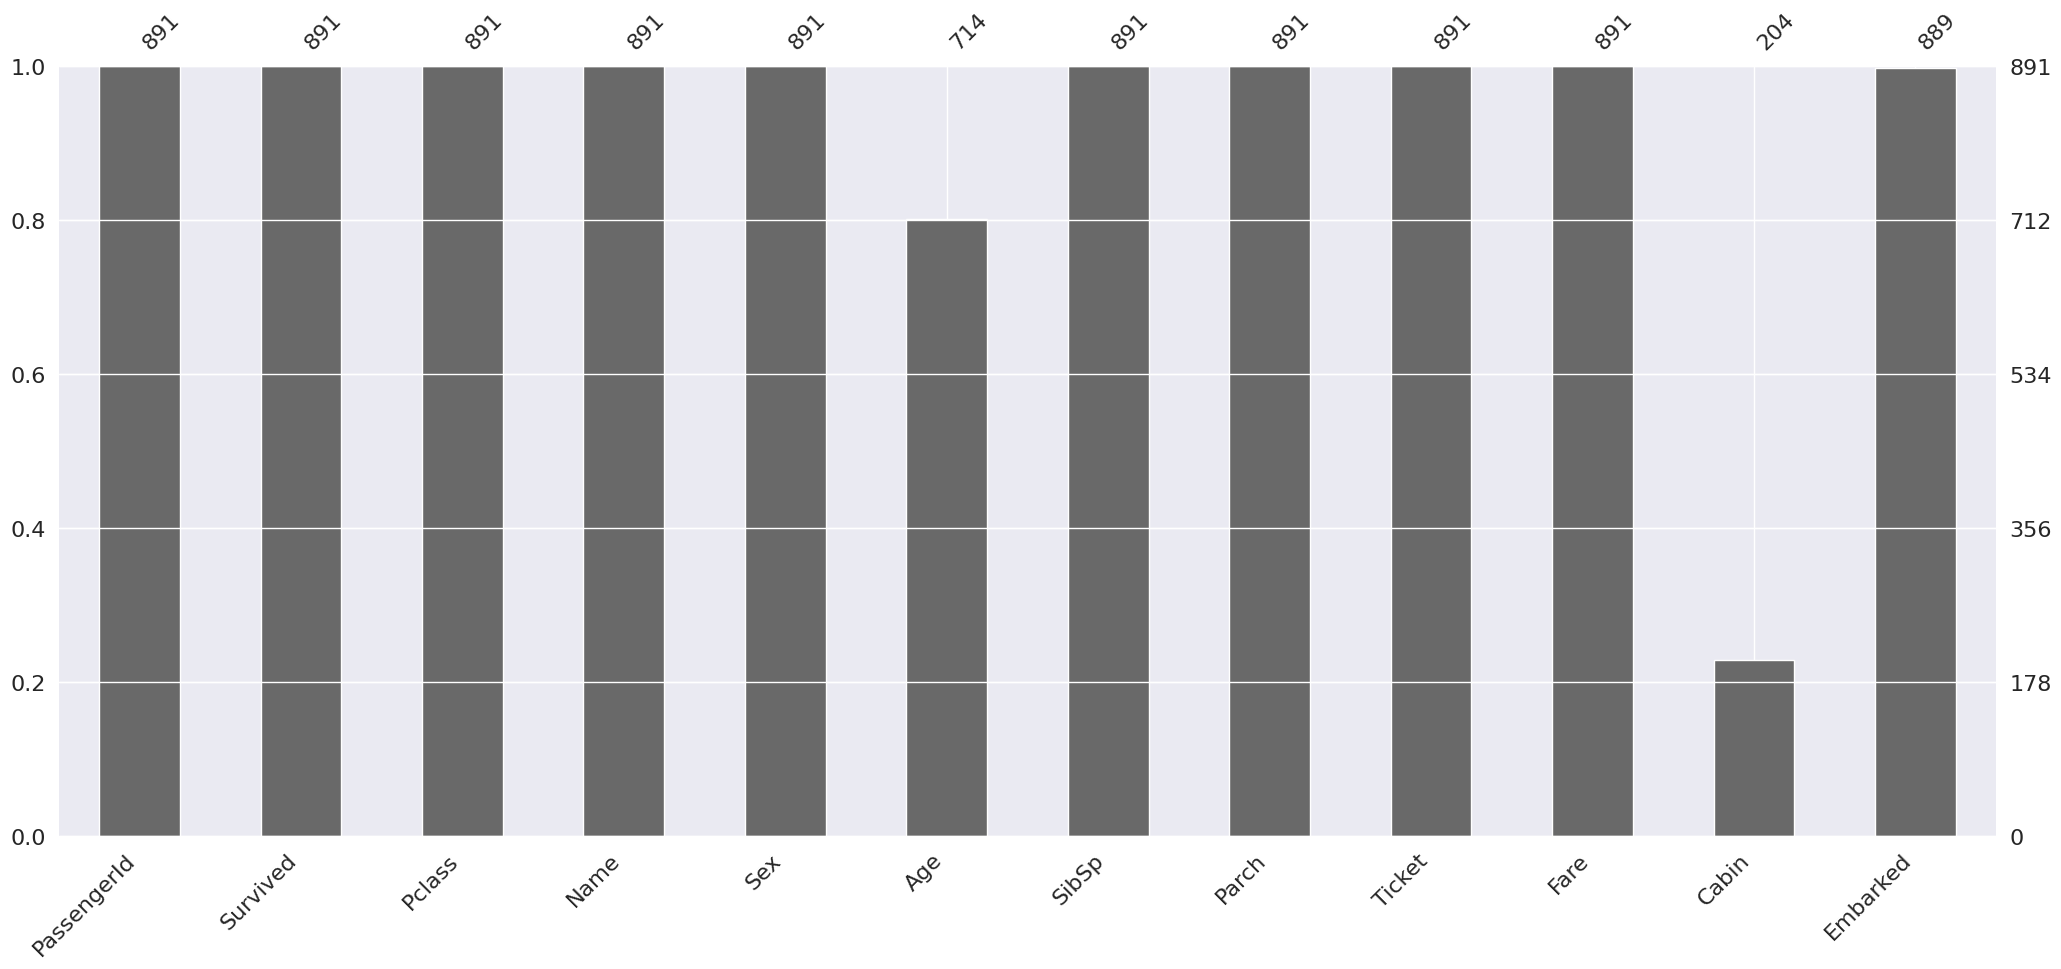

In [32]:
# Visualize missing data using missingno library
import missingno as msno
msno.bar(train)

In [19]:
# Impute Age with median
full_data['Age'].fillna(full_data['Age'].median(), inplace=True)

# Drop Cabin (too many missing values)
full_data.drop('Cabin', axis=1, inplace=True)

# Impute Embarked with mode
full_data['Embarked'].fillna(full_data['Embarked'].mode()[0], inplace=True)

# Impute single missing Fare with median
full_data['Fare'].fillna(full_data['Fare'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(full_data.isnull().sum())


Missing values after imputation:
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


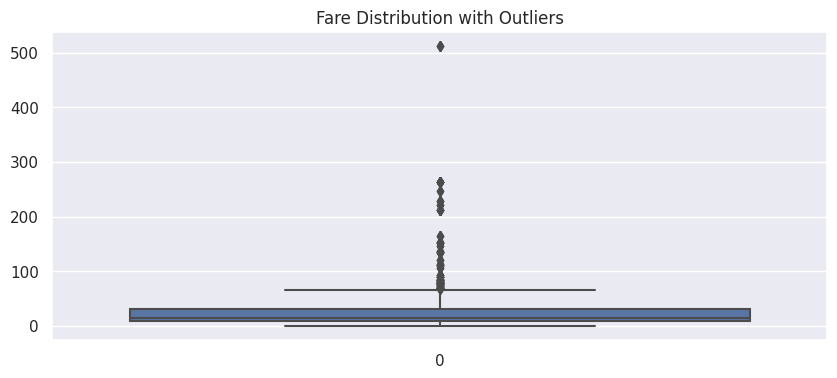

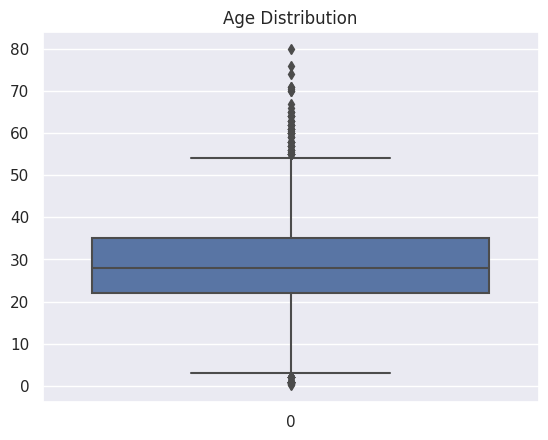

In [20]:
# Visualize Fare distribution
plt.figure(figsize=(10, 4))
sns.boxplot(full_data['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

# Cap Fare at 99th percentile
fare_cap = full_data['Fare'].quantile(0.99)
full_data['Fare'] = np.where(full_data['Fare'] > fare_cap, fare_cap, full_data['Fare'])

# Check Age for outliers
sns.boxplot(full_data['Age'])
plt.title("Age Distribution")
plt.show()
# No extreme outliers in Age

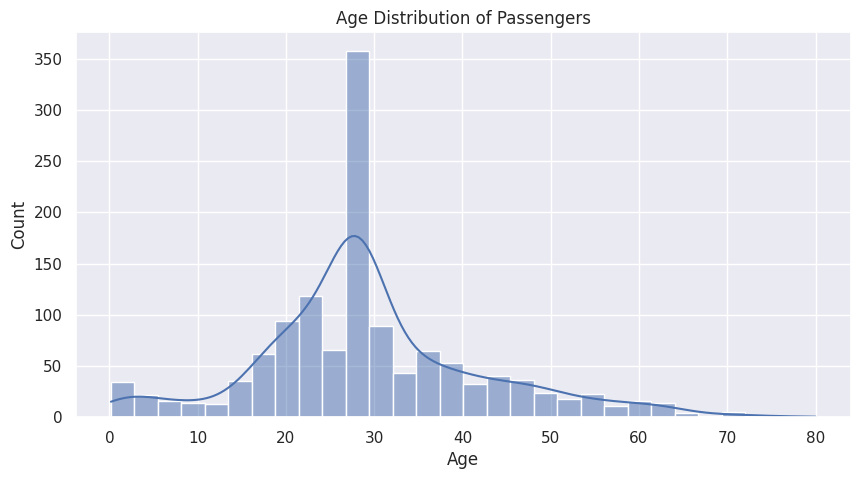

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(full_data['Age'], kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.show()

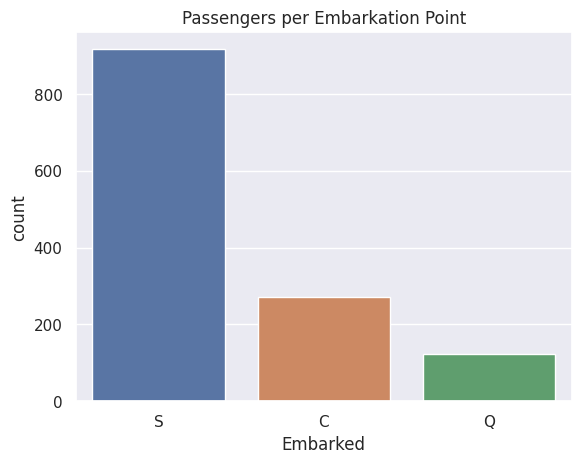

In [22]:
sns.countplot(x='Embarked', data=full_data)
plt.title("Passengers per Embarkation Point")
plt.show()

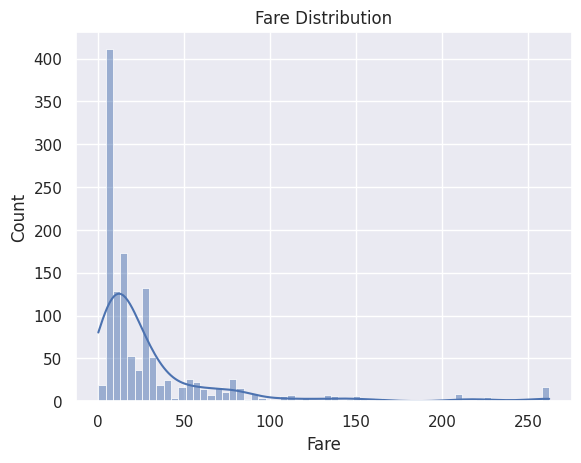

In [23]:
sns.histplot(full_data['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

Bivariate Analysis
Does Fare change depending on Pclass?

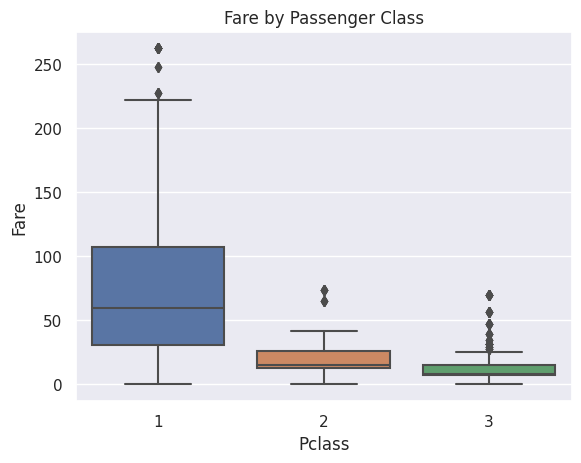

In [24]:
sns.boxplot(x='Pclass', y='Fare', data=full_data)
plt.title("Fare by Passenger Class")
plt.show()

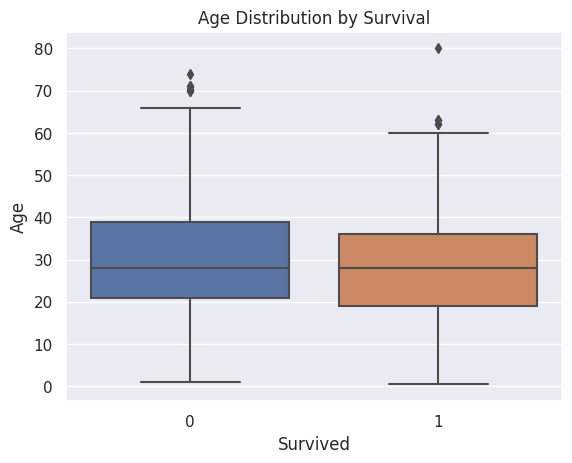

In [25]:
##Are younger passengers more likely to survive?
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age Distribution by Survival")
plt.show()

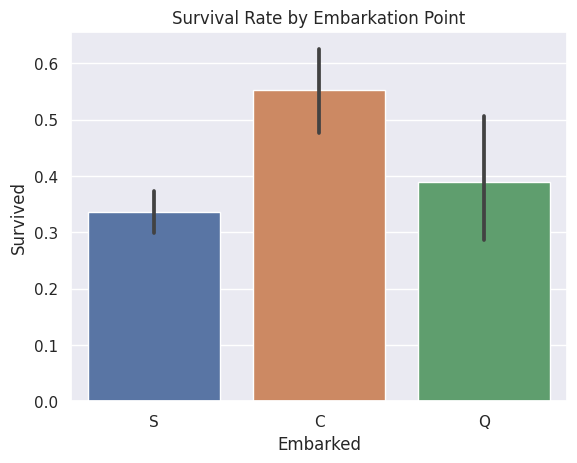

In [27]:
##Does Embarked location affect survival rate?
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title("Survival Rate by Embarkation Point")
plt.show()

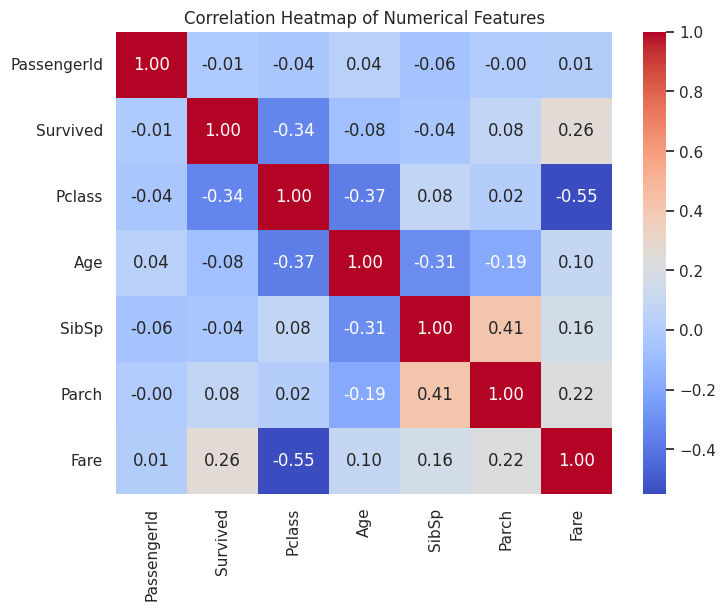

In [33]:
# Correlation heatmap for numerical columns only
plt.figure(figsize=(8, 6))
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns  # Select only numerical columns
sns.heatmap(train[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Multivariate Analysis

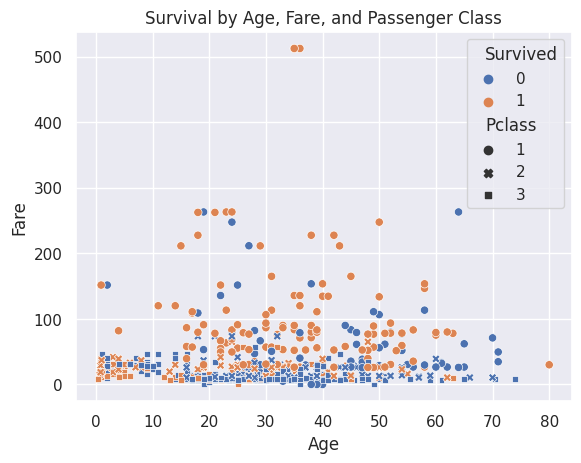

In [28]:
##How do Pclass, Age, and Fare jointly affect survival?
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Pclass', data=train)
plt.title("Survival by Age, Fare, and Passenger Class")
plt.show()

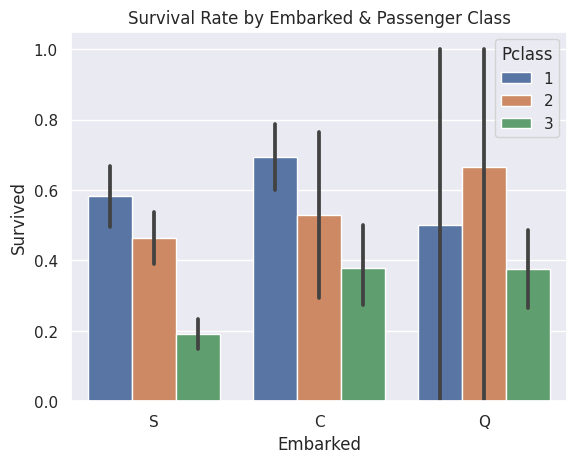

In [29]:
## Are survival rates different by Embarked when considering Pclass?
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train)
plt.title("Survival Rate by Embarked & Passenger Class")
plt.show()

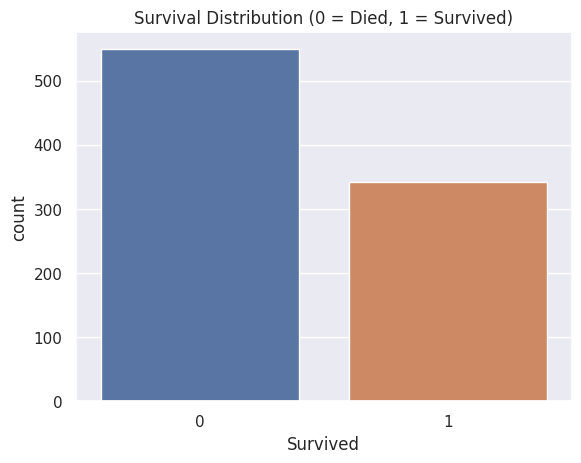

Survival Rate: 0.3838383838383838


In [30]:
##Target Variable Analysis (Survived)
sns.countplot(x='Survived', data=train)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()
print("Survival Rate:", train['Survived'].mean())

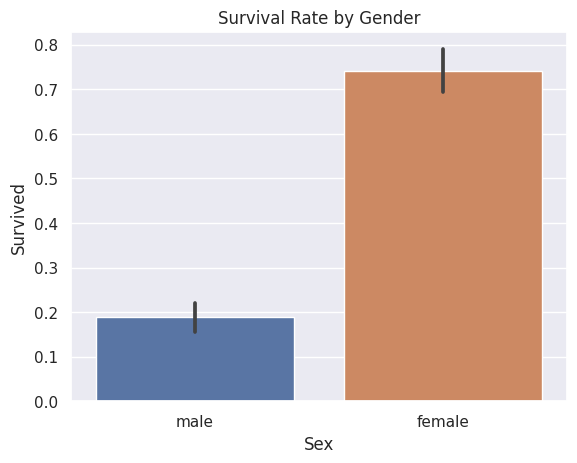

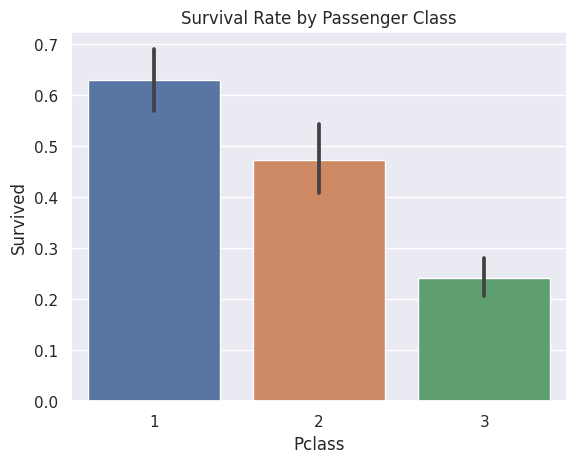

In [31]:
# Gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival Rate by Gender")
plt.show()

# Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()